In [28]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image

import spacy
nlp = spacy.load("en_core_web_sm")

# Explorando o detalhamento geral do dataset

In [2]:
movies = pd.read_csv('netflix_titles.csv')
movies.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
movies.country.unique()[:10]

array(['United States', 'South Africa', nan, 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia'], dtype=object)

# Explorando detalhamento de filmes Brasileiros

In [5]:
movies_br = movies.loc[movies.country.str.contains("Brazil", na=False)]
movies_br.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
270,s271,Movie,Beckett,Ferdinando Cito Filomarino,"John David Washington, Boyd Holbrook, Alicia V...","Italy, Brazil, Greece","August 13, 2021",2021,TV-MA,110 min,Action & Adventure,An American tourist goes on the run in Greece ...
302,s303,Movie,City of God: 10 Years Later,"Cavi Borges, Luciano Vidigal",NaN,Brazil,"August 5, 2021",2013,TV-MA,69 min,"Documentaries, International Movies","A decade after the seminal Brazilian film ""Cit..."
650,s651,Movie,O Vendedor de Sonhos,Jayme Monjardim,"César Troncoso, Dan Stulbach, Thiago Mendonça,...",Brazil,"June 22, 2021",2016,TV-14,96 min,"Dramas, International Movies",A disillusioned psychologist tries to commit s...


In [6]:
movies_br.listed_in.head()

270                                  Action & Adventure
302                 Documentaries, International Movies
650                        Dramas, International Movies
783    Comedies, International Movies, Music & Musicals
894    Dramas, Independent Movies, International Movies
Name: listed_in, dtype: object

## Quais os gêneros mais frequêntes?

In [9]:
def spĺit_genre(line):
    # stopwords = ['tv', 'movies', 'international', 'shows', 'documentaries']
    source_line = (line
                   .lower()
                   .replace(',', '')
                   .replace('&', '')
                   .split(' '))
    func = lambda a: bool(a)
    source_line = list(filter(func, source_line))
    return source_line
    

In [10]:
genre_list = (movies_br
              .listed_in
              .apply(spĺit_genre)
              .explode()
              .to_frame())
genre_list.head(10)

,listed_in
270,action
270,adventure
302,documentaries
302,international
302,movies
650,dramas
650,international
650,movies
783,comedies
783,international


In [11]:
doc = nlp(str([word for word in genre_list.listed_in]))
doc_lemma = [token.lemma_ for token in doc if token.pos_ == 'NOUN']
doc_lemma[:5]

['action', 'adventure', 'documentary', 'movie', 'drama']

In [12]:
genre_count = (pd.Series(doc_lemma)
                .value_counts()
                .to_frame()
                .reset_index()
                .dropna())
genre_count.columns = ['genre', 'total']
genre_count.head()

,genre,total
0,tv,70
1,movie,69
2,drama,37
3,comedy,36
4,documentary,12


[Text(0.5, 1.0, 'Top 10 Gêneros nos filmes Brasileiros da Netflix')]

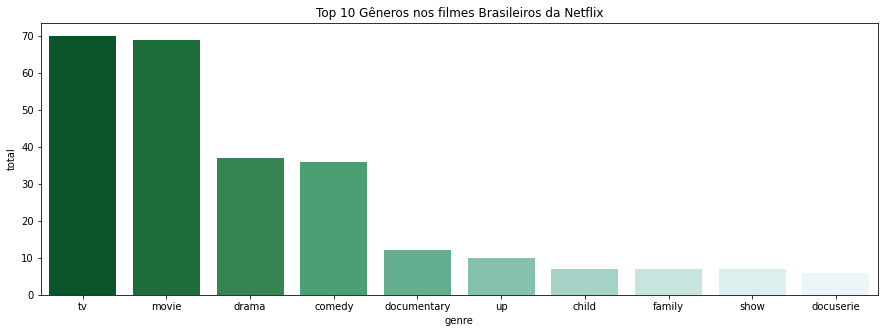

In [50]:
plt.figure(figsize=(15, 5))
ax= sns.barplot(data=genre_count[:10], 
            x='genre', 
            y='total', 
            palette='BuGn_r')
ax.set(title='Top 10 Gêneros nos filmes Brasileiros da Netflix')

In [ ]:

d = os.path.dirname(__file__) if "__file__" in locals() else os.getcwd()
brasil_mask = np.array(Image.open(os.path.join(d, "bandeira.png")))


In [43]:
sw_string = ' '.join(movies_br.description)
word_cloud = WordCloud(width=200, background_color="white", max_words=2000, mask=brasil_mask,
               contour_width=3, contour_color='steelblue').generate(sw_string)

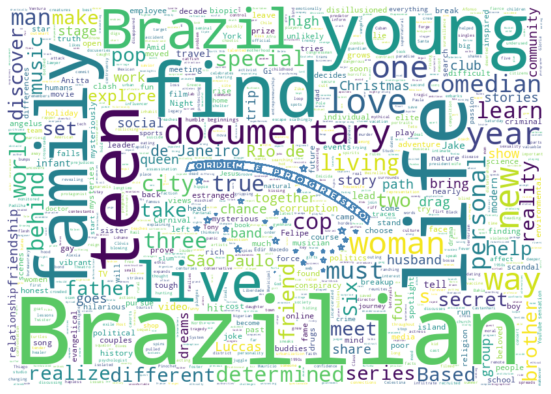

In [44]:
plt.figure(figsize= (15, 7))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()